In [1]:
library(lubridate) # Extract month,year,day from date column
library(dplyr) # subset function
library(ggplot2)


Attaching package: 'lubridate'


The following object is masked from 'package:base':

    date


Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:lubridate':

    intersect, setdiff, union


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'ggplot2' was built under R version 3.6.3"


In [3]:
ridership = read.csv("../../data/raw/ridership-2019-2020-.csv")

In [16]:
df_2020 = read.csv("../../data/raw/MBTA-2020-energy-consumption.csv")

In [18]:
head(df_2020)

,ObjectName,Property,Timestamp,Value,Unit
,<fct>,<fct>,<fct>,<dbl>,<fct>
1,Park St Station,Demand Power 15 min,1/1/2020 0:00,171.840,kW
2,Park St Station,Demand Power 15 min,1/1/2020 0:15,171.960,kW
3,Park St Station,Demand Power 15 min,1/1/2020 0:30,174.456,kW
4,Park St Station,Demand Power 15 min,1/1/2020 0:45,171.648,kW
5,Park St Station,Demand Power 15 min,1/1/2020 1:00,168.816,kW
6,Park St Station,Demand Power 15 min,1/1/2020 1:15,174.096,kW


In [15]:
 options(tz = "America/New_York")
df_2020$time = as.POSIXct(as.character(df_2020$Timestamp),tz = getOption("tz"))

ERROR: Error in as.POSIXlt.character(x, tz, ...): character string is not in a standard unambiguous format


In [20]:
sum(df_2020$Value,na.rm =TRUE)

[1] 49812114

In [11]:
df_2020$Year = year(df_2020$Timestamp)
df_2020$Month = month(df_2020$Timestamp)
df_2020$Day = day(df_2020$Timestamp)

ERROR: Error in as.POSIXlt.character(as.character(x), ...): character string is not in a standard unambiguous format


In [5]:
# Add time scale columns
ridership$Year = year(ridership$servicedate)
ridership$Month = month(ridership$servicedate)
ridership$Day = day(ridership$servicedate)

## Ridership analysis for a given year

In [23]:
png("../../figures/ridership-time-series.png",height= 1500,width=7000,res=360)
ggplot(data=ridership, aes(x=as.Date(servicedate), y=rawtaps_split))+scale_x_date(date_labels = "%Y %b")+
 labs(title = "Daily ridership time series", y = "Ridership",x = "Month")+geom_line(color="#69b3a2")+
 theme(axis.text=element_text(size=15),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20))+
 guides(fill=FALSE)
dev.off()

png 
  2

In [7]:
aggdata <- aggregate(ridership$rawtaps_split,by=list(ridership$Year),FUN=sum,na.rm=TRUE)

In [8]:
aggdata

Group.1,x
<dbl>,<dbl>
2019,151291530
2020,51731720


In [43]:
ridership_origin = subset(ridership,ridership$Year == 2020,select = c(Year,Month,Day,route_or_line,servicedate,rawtaps_split))

In [37]:
ridership_analysis = function(year){
    ridership_origin = subset(ridership,ridership$Year == year,select = c(Year,Month,Day,route_or_line,servicedate,rawtaps_split))
    ridership_month_average = tapply(ridership_origin$rawtaps_split,ridership_origin$Month,mean)
    ridership_month_sum = tapply(ridership_origin$rawtaps_split,ridership_origin$Month,sum)
    ridership_table = data.frame(month = c(1,2,3,4,5,6,7,8,9,10,11,12),ridership_month_average,ridership_month_sum)
    # pLot monthly riership
    p = ggplot(data=ridership_table, aes(x=factor(month), y=ridership_month_sum/1000000，fill=factor(month)))+ geom_bar(stat = "identity")+
    labs(title = "2020 total Monthly ridership ", y = "Ridership (million)",x = "Month")+
    theme(axis.text=element_text(size=15),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20))+
    guides(fill=FALSE)
    return(p)
}

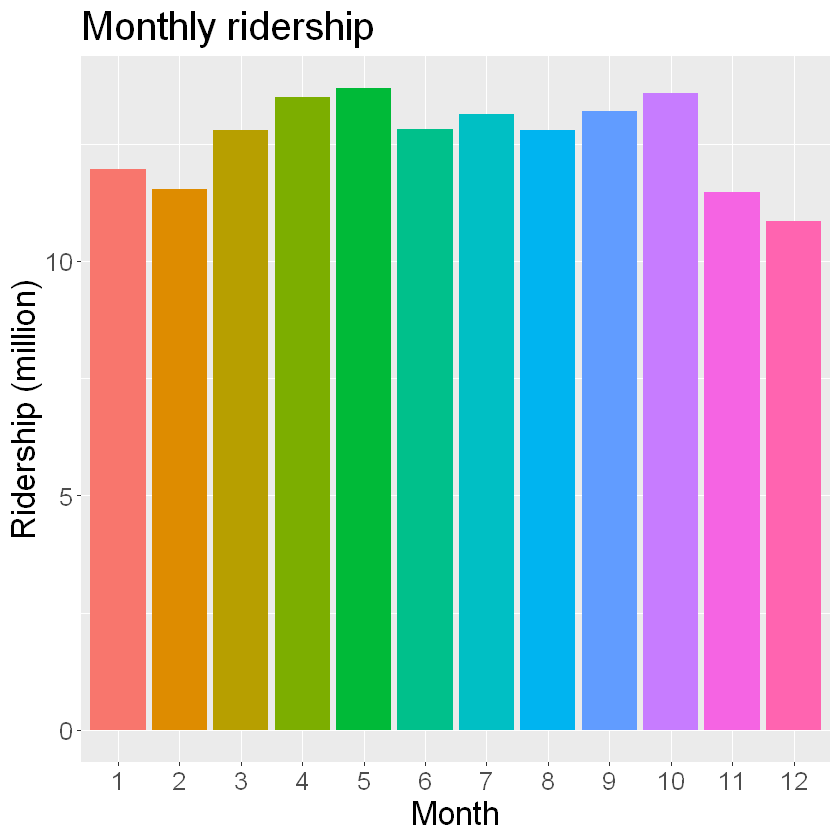

In [29]:
ridership_analysis(2019)

In [15]:
ridership_table

ERROR: Error in eval(expr, envir, enclos): object 'ridership_table' not found


In [38]:
png("../../figures/2020-monthly-ridership.png",height= 1500,width=2000,res=360)
ridership_analysis(2020)
dev.off()

png 
  2

In [ ]:
ggplot(data=ridership_table, aes(x=factor（month）, y=ridership_month_average，fill=factor(month)))+ geom_bar(stat = "identity")+
    labs(title = "Monthly average ridership ", y = "Ridership",x = "Month")+
    theme(axis.text=element_text(size=15),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20))+
    guides(fill=FALSE)

In [ ]:
# Yearly/daily/hourly (not sure necessary or not)
# Point:Ridership data could be used to define peak hour and off peak
# Some metrics regarding ridership.(ridership/mile and ridership/hour)
